In [1]:
# Import the required libraries and dependencies
import pandas as pd

In [2]:
# Read csv file as DataFrame, with datetime index as the column date
data_path = "../Resources/bitcoin_hourly.csv"
df = pd.read_csv(
    data_path,
    infer_datetime_format=True,
    parse_dates=True,
    index_col='date'
)

# Preview the dataset
df.head()

/var/folders/cf/y6vhhqvs245bxntt_6f300v00000gp/T/ipykernel_72606/3892051126.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


,close,volume
date,,
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
2017-08-17 09:00:00,4444.00,10.763623


<Axes: xlabel='date'>

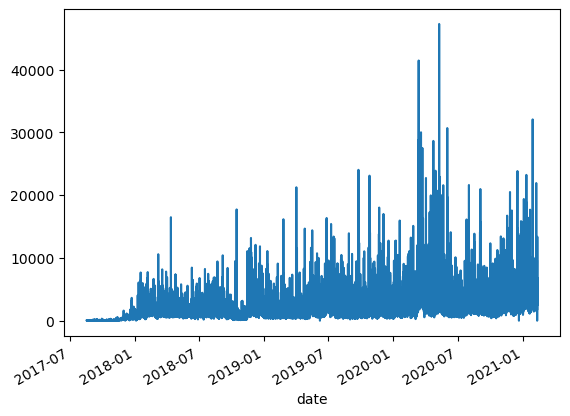

In [3]:
# Plot volume to get a sense of what's typical volume for the cryptocurrency.
df['volume'].plot()


<Axes: xlabel='week'>

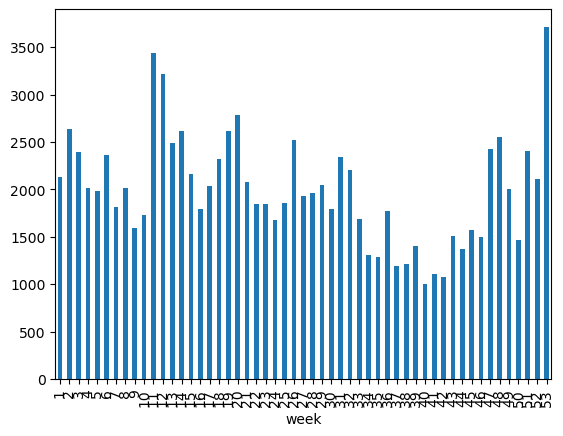

In [10]:
# Use groupby and the isocalendar().week function on the datetime index to create a bar plot of the data
df.groupby(df.index.isocalendar().week)['volume'].mean().plot(kind='bar')


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

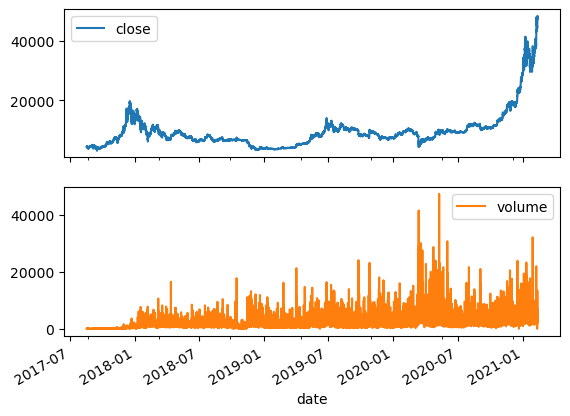

In [15]:
# Plot hourly trends in prices and volume for the cryptocurrency
df[['close', 'volume']].plot(subplots=True)


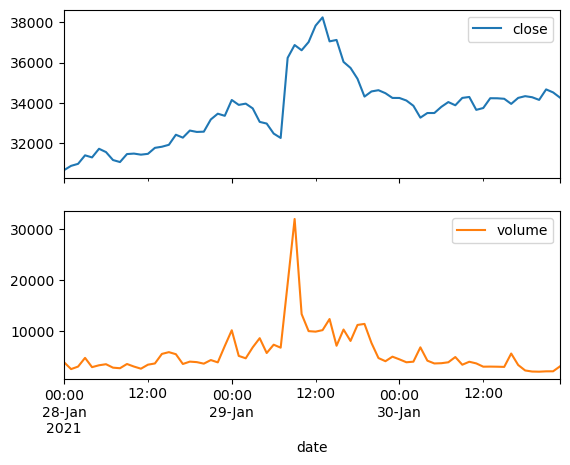

In [16]:
# Sort the DataFrame by the index (date)
df = df.sort_index()

# Check if the specific dates exist in the DataFrame
if pd.Timestamp('2021-01-28') in df.index and pd.Timestamp('2021-01-30') in df.index:
    # Slice to one day before and after Jan 29, 2021
    df_sliced = df.loc['2021-01-28':'2021-01-30']
    df_sliced.plot(subplots=True)
else:
    print("The specified date range is not available in the DataFrame.")
